In [1]:
import pandas
import numpy
import pmdarima as pm
import matplotlib.pyplot as plt
from TimeSeriesModelCreator_Parallel_talos import TimeSeriesModelCreator_Parallel_talos

Using TensorFlow backend.


In [2]:
label_size = 20

# Read in dataset and prepare training and testing sets

In [3]:
dataframe = pandas.read_csv(r'..\Datasets\GEANTCombined\all_in_one_complete_appended.csv')
subsets_training = []
subsets_testing = []
for x in range(1,6):
    subsets_training.append(dataframe[(dataframe.source == 2) & (dataframe.destination == 11)][['bandwidth']][-(1000+200):-200])
    subsets_testing.append(dataframe[(dataframe.source == 2) & (dataframe.destination == 11)][['bandwidth']][-200:])

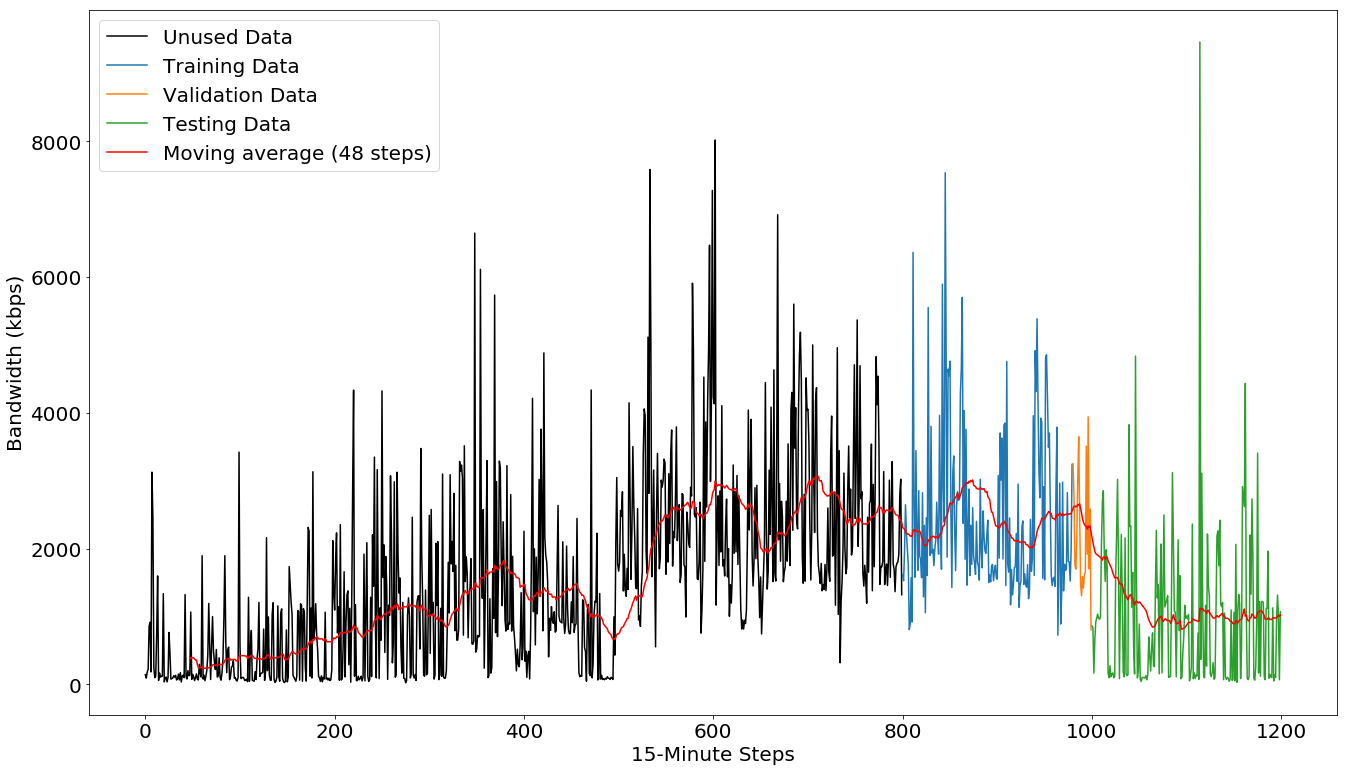

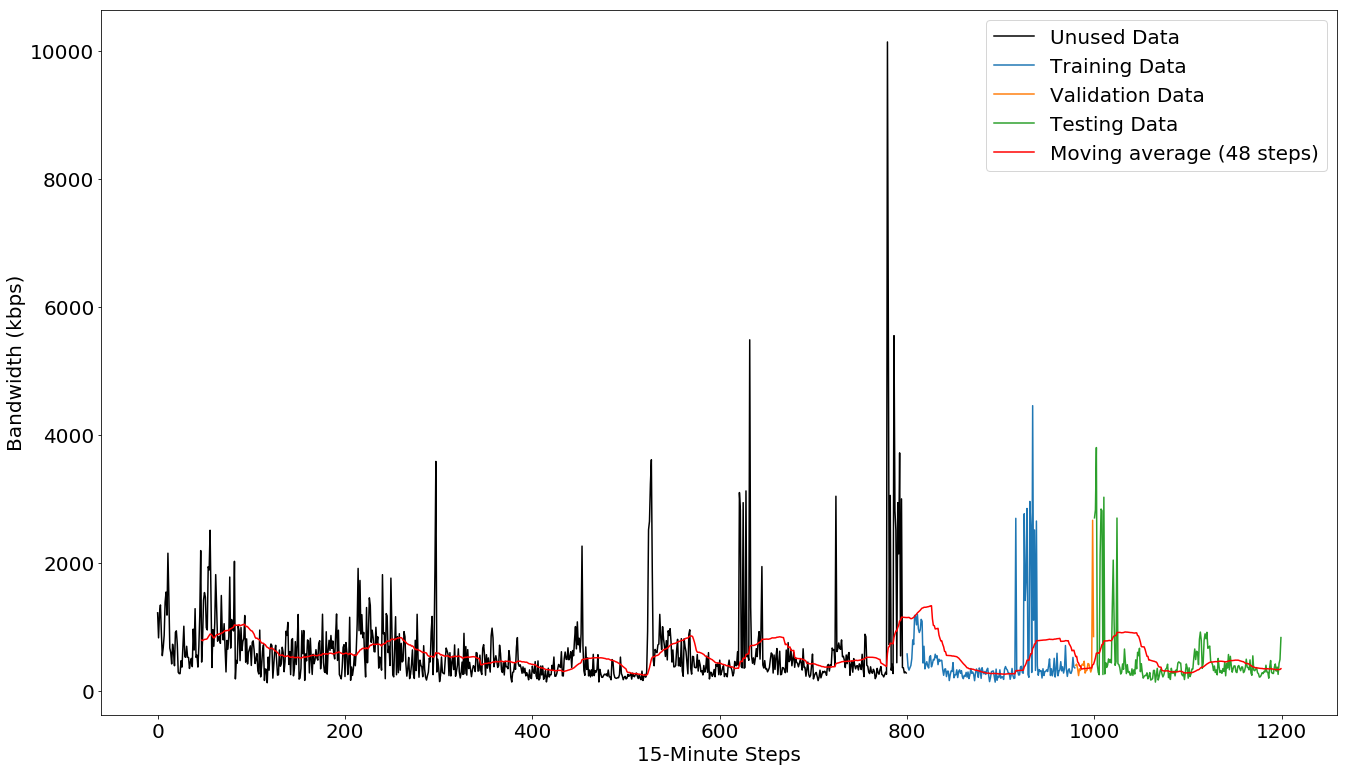

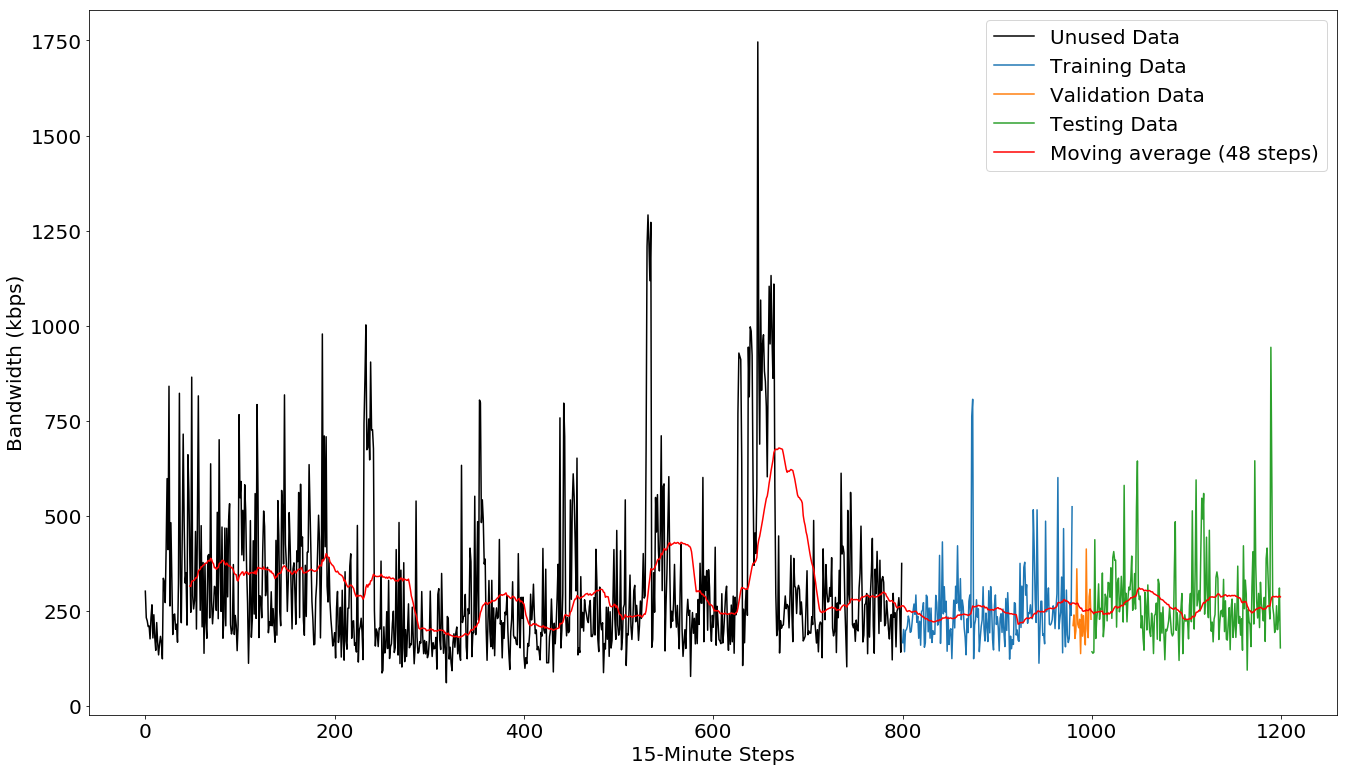

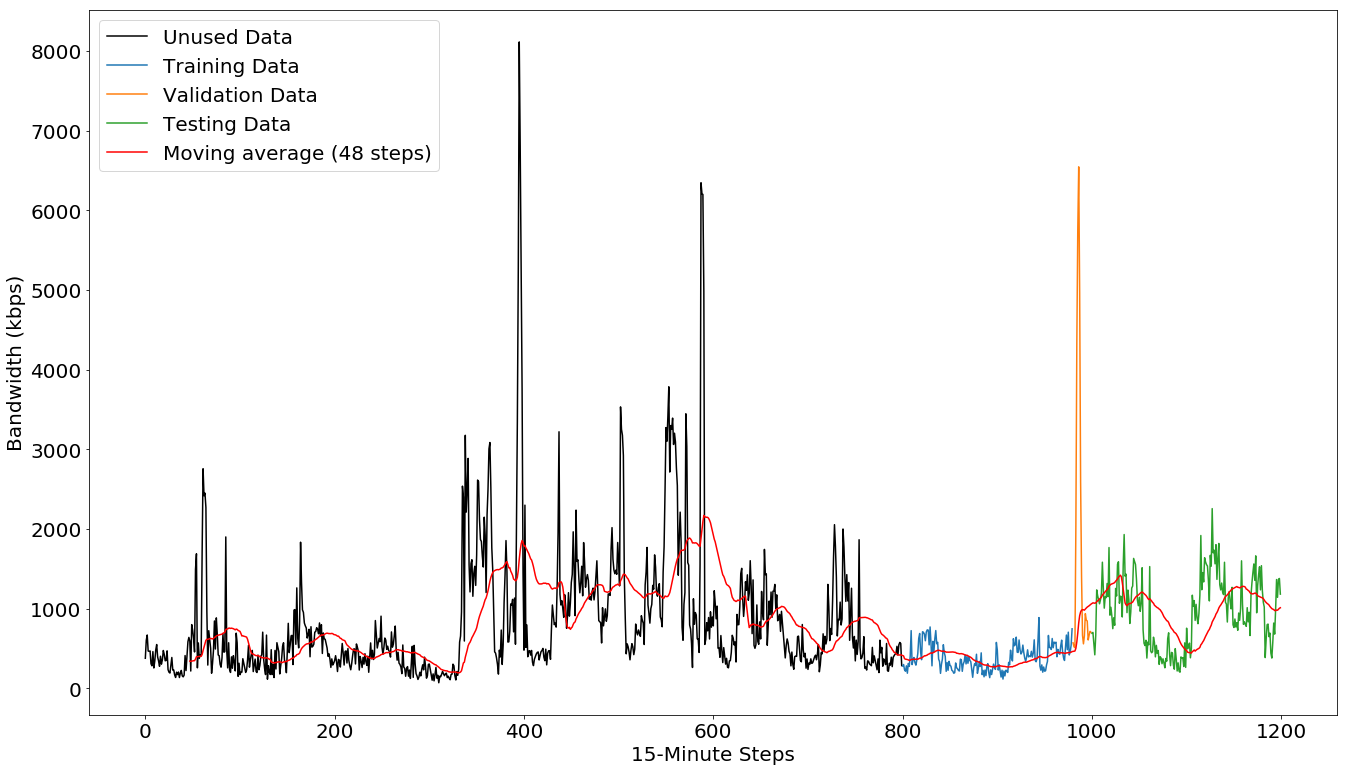

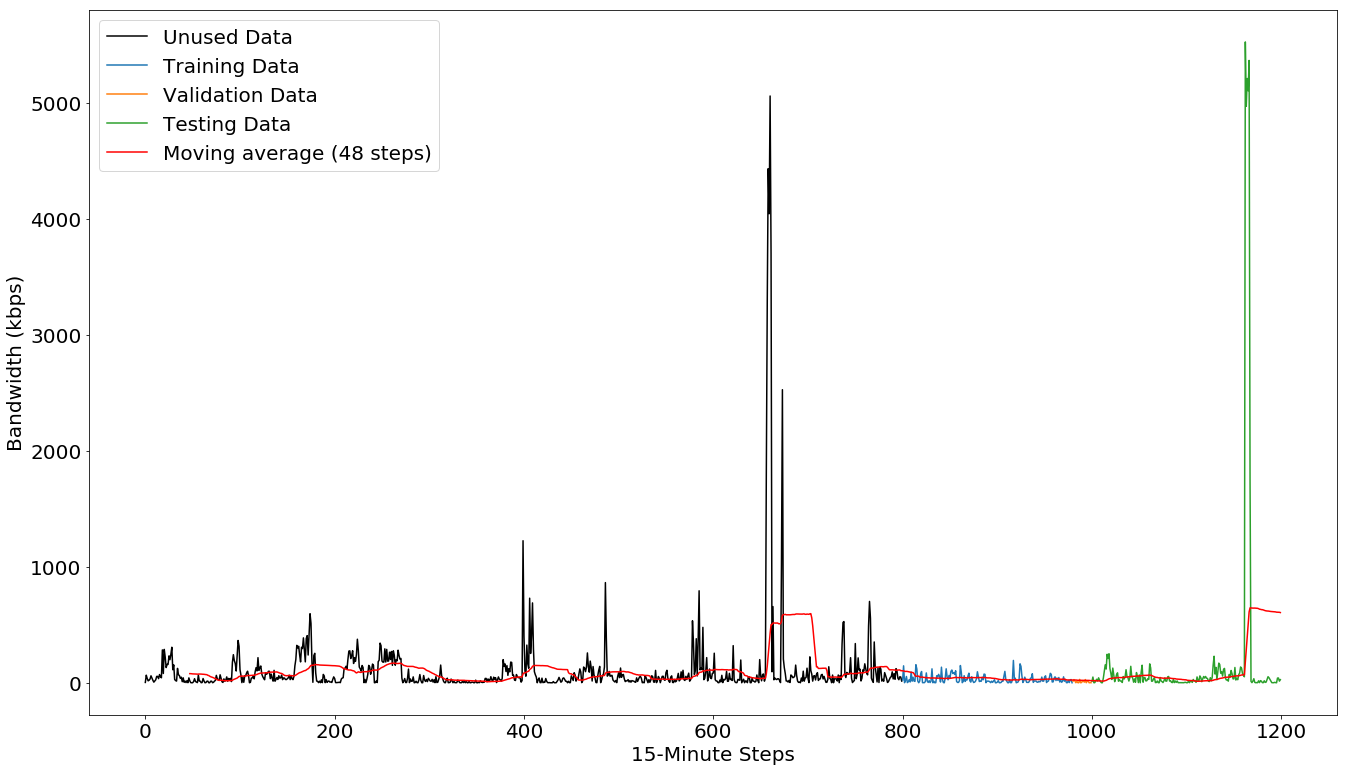

In [4]:
sources = [1,2,3,4,5]
for source in sources:
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax1.tick_params(labelsize = label_size)
    for destination in range(11,12):
        #print(source)
        #print(destination)
        plot_data = dataframe[(dataframe.source==source) & (dataframe.destination==destination)][-1200:].reset_index(drop=True)
        plot_data['ma'] = plot_data['bandwidth'].rolling(window=48).mean()
        ax1.plot(plot_data['bandwidth'][:800], label='Unused Data', color="black")
        ax1.plot(plot_data['bandwidth'][800:980], label='Training Data')
        ax1.plot(plot_data['bandwidth'][980:1000], label='Validation Data')
        ax1.plot(plot_data['bandwidth'][1000:1200], label='Testing Data')
        ax1.plot(plot_data['ma'], label='Moving average (48 steps)', color = 'red')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.xlabel('15-Minute Steps', fontsize = label_size)
    plt.ylabel('Bandwidth (kbps)', fontsize = label_size)
    ax1.legend(fontsize = label_size)
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\Traffic_optimized_rolling_average_{0}.pdf'.format(source))
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\Traffic_optimized_rolling_average_{0}.svg'.format(source))
    plt.show()

# Creating LSTM and training

In [5]:
creators = []
for x in range(1,7):
    creator = TimeSeriesModelCreator_Parallel_talos(2, r'..\Datasets\GEANTCombined\all_in_one_complete_appended.csv')
    modelMatch = {}
    creator.add_new_model(name = 'test'+str(2), nodes = 1, layer = 1, loss='mean_squared_error', optimizer='adam')
    modelMatch[str(2)+'_11'] = 'test'+str(2)
    creator.train_model(2, 2, 11, 11, x*100, 200, modelMatch, epoch = 1000, batch_size = 128, shift = 0)
    creators.append(creator)

W1119 15:12:20.243793  8512 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 15:12:20.256760  8512 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 15:12:20.258026  8512 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1119 15:12:20.387701  8512 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1119 15:12:20.552261  8512 deprecation.py:323] From c:\program files\python

Source: 2 / Destination: 11
(98, 2, 1)


W1119 15:12:20.922245  8512 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1119 15:12:20.975131  8512 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 78 samples, validate on 20 samples
Epoch 1/1000
78/78 [==============================] - 1s 7ms/step - loss: 0.0516 - val_loss: 0.0204
Epoch 2/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0513 - val_loss: 0.0203
Epoch 3/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0511 - val_loss: 0.0201
Epoch 4/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0509 - val_loss: 0.0200
Epoch 5/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0506 - val_loss: 0.0198
Epoch 6/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0504 - val_loss: 0.0197
Epoch 7/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0502 - val_loss: 0.0195
Epoch 8/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0499 - val_loss: 0.0194
Epoch 9/1000
78/78 [==============================] - 0s 39us/step - loss: 0.0497 - val_loss: 0.0192
Epoch 10/1000
78/78 [===========================

Epoch 81/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0401 - val_loss: 0.0144
Epoch 82/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0400 - val_loss: 0.0144
Epoch 83/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0400 - val_loss: 0.0144
Epoch 84/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0399 - val_loss: 0.0144
Epoch 85/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0399 - val_loss: 0.0144
Epoch 86/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0398 - val_loss: 0.0144
Epoch 87/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0398 - val_loss: 0.0143
Epoch 88/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0397 - val_loss: 0.0143
Epoch 89/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0397 - val_loss: 0.0143
Epoch 90/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0397

Epoch 161/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0383 - val_loss: 0.0148
Epoch 162/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0383 - val_loss: 0.0148
Epoch 163/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0382 - val_loss: 0.0148
Epoch 164/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0382 - val_loss: 0.0148
Epoch 165/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0382 - val_loss: 0.0148
Epoch 166/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0382 - val_loss: 0.0148
Epoch 167/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0382 - val_loss: 0.0148
Epoch 168/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0382 - val_loss: 0.0148
Epoch 169/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0382 - val_loss: 0.0148
Epoch 170/1000
78/78 [==============================] - 0s 26us/step - lo

Epoch 241/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 242/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 243/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 244/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 245/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 246/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 247/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 248/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 249/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0378 - val_loss: 0.0151
Epoch 250/1000
78/78 [==============================] - 0s 26us/step - lo

Epoch 321/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 322/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 323/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 324/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 325/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 326/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 327/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 328/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 329/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0374 - val_loss: 0.0150
Epoch 330/1000
78/78 [==============================] - 0s 51us/step - lo

Epoch 401/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 402/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 403/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 404/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 405/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 406/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 407/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 408/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 409/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0367 - val_loss: 0.0148
Epoch 410/1000
78/78 [==============================] - 0s 51us/step - lo

Epoch 481/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0358 - val_loss: 0.0146
Epoch 482/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0358 - val_loss: 0.0146
Epoch 483/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0357 - val_loss: 0.0146
Epoch 484/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0357 - val_loss: 0.0146
Epoch 485/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0357 - val_loss: 0.0146
Epoch 486/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0357 - val_loss: 0.0146
Epoch 487/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0357 - val_loss: 0.0146
Epoch 488/1000
78/78 [==============================] - 0s 77us/step - loss: 0.0357 - val_loss: 0.0146
Epoch 489/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0357 - val_loss: 0.0146
Epoch 490/1000
78/78 [==============================] - 0s 38us/step - lo

Epoch 561/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0346 - val_loss: 0.0144
Epoch 562/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0346 - val_loss: 0.0144
Epoch 563/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0346 - val_loss: 0.0144
Epoch 564/1000
78/78 [==============================] - 0s 64us/step - loss: 0.0346 - val_loss: 0.0144
Epoch 565/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0346 - val_loss: 0.0144
Epoch 566/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0345 - val_loss: 0.0144
Epoch 567/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0345 - val_loss: 0.0144
Epoch 568/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0345 - val_loss: 0.0144
Epoch 569/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0345 - val_loss: 0.0144
Epoch 570/1000
78/78 [==============================] - 0s 38us/step - lo

Epoch 641/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 642/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 643/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 644/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 645/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 646/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 647/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 648/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0336 - val_loss: 0.0143
Epoch 649/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0335 - val_loss: 0.0143
Epoch 650/1000
78/78 [==============================] - 0s 26us/step - lo

Epoch 721/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 722/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 723/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 724/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 725/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 726/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 727/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 728/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 729/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0330 - val_loss: 0.0143
Epoch 730/1000
78/78 [==============================] - 0s 38us/step - lo

Epoch 801/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0327 - val_loss: 0.0144
Epoch 802/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0327 - val_loss: 0.0144
Epoch 803/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0327 - val_loss: 0.0144
Epoch 804/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0327 - val_loss: 0.0144
Epoch 805/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0327 - val_loss: 0.0144
Epoch 806/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0326 - val_loss: 0.0144
Epoch 807/1000
78/78 [==============================] - 0s 25us/step - loss: 0.0326 - val_loss: 0.0144
Epoch 808/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0326 - val_loss: 0.0144
Epoch 809/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0326 - val_loss: 0.0144
Epoch 810/1000
78/78 [==============================] - 0s 38us/step - lo

Epoch 881/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 882/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 883/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 884/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 885/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 886/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 887/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 888/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 889/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0324 - val_loss: 0.0144
Epoch 890/1000
78/78 [==============================] - 0s 26us/step - lo

Epoch 961/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 962/1000
78/78 [==============================] - 0s 26us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 963/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 964/1000
78/78 [==============================] - 0s 51us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 965/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 966/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 967/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 968/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 969/1000
78/78 [==============================] - 0s 38us/step - loss: 0.0322 - val_loss: 0.0144
Epoch 970/1000
78/78 [==============================] - 0s 38us/step - lo

158/158 [==============================] - 0s 32us/step - loss: 0.0186 - val_loss: 0.0077
Epoch 40/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0186 - val_loss: 0.0077
Epoch 41/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0186 - val_loss: 0.0077
Epoch 42/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0186 - val_loss: 0.0077
Epoch 43/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0186 - val_loss: 0.0077
Epoch 44/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0186 - val_loss: 0.0077
Epoch 45/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0186 - val_loss: 0.0078
Epoch 46/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0185 - val_loss: 0.0078
Epoch 47/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0185 - val_loss: 0.0077
Epoch 48/1000
158/158 [==============================] - 0s 38us/step - loss: 

158/158 [==============================] - 0s 32us/step - loss: 0.0181 - val_loss: 0.0075
Epoch 118/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0181 - val_loss: 0.0075
Epoch 119/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0181 - val_loss: 0.0075
Epoch 120/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0181 - val_loss: 0.0075
Epoch 121/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0181 - val_loss: 0.0075
Epoch 122/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0180 - val_loss: 0.0076
Epoch 123/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0180 - val_loss: 0.0076
Epoch 124/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0180 - val_loss: 0.0076
Epoch 125/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0180 - val_loss: 0.0076
Epoch 126/1000
158/158 [==============================] - 0s 38us/step

Epoch 195/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0177 - val_loss: 0.0076
Epoch 196/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0176 - val_loss: 0.0076
Epoch 197/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0176 - val_loss: 0.0076
Epoch 198/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0176 - val_loss: 0.0076
Epoch 199/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0176 - val_loss: 0.0076
Epoch 200/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0176 - val_loss: 0.0077
Epoch 201/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0176 - val_loss: 0.0077
Epoch 202/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0176 - val_loss: 0.0077
Epoch 203/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0176 - val_loss: 0.0077
Epoch 204/1000
158/158 [==============================]

Epoch 273/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 274/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 275/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 276/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 277/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 278/1000
158/158 [==============================] - 0s 51us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 279/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 280/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 281/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0174 - val_loss: 0.0076
Epoch 282/1000
158/158 [==============================]

158/158 [==============================] - 0s 32us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 352/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 353/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 354/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 355/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 356/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 357/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 358/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 359/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0172 - val_loss: 0.0077
Epoch 360/1000
158/158 [==============================] - 0s 38us/step

158/158 [==============================] - 0s 38us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 430/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 431/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 432/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 433/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 434/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 435/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 436/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 437/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0171 - val_loss: 0.0077
Epoch 438/1000
158/158 [==============================] - 0s 38us/step

158/158 [==============================] - 0s 44us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 508/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 509/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 510/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 511/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 512/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 513/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 514/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 515/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0170 - val_loss: 0.0078
Epoch 516/1000
158/158 [==============================] - 0s 51us/step

158/158 [==============================] - 0s 44us/step - loss: 0.0169 - val_loss: 0.0078
Epoch 586/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0169 - val_loss: 0.0078
Epoch 587/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0169 - val_loss: 0.0078
Epoch 588/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0169 - val_loss: 0.0078
Epoch 589/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0169 - val_loss: 0.0078
Epoch 590/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0169 - val_loss: 0.0078
Epoch 591/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0169 - val_loss: 0.0078
Epoch 592/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0169 - val_loss: 0.0077
Epoch 593/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0169 - val_loss: 0.0077
Epoch 594/1000
158/158 [==============================] - 0s 32us/step

Epoch 663/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0168 - val_loss: 0.0078
Epoch 664/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0168 - val_loss: 0.0078
Epoch 665/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 666/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 667/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 668/1000
158/158 [==============================] - 0s 35us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 669/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 670/1000
158/158 [==============================] - 0s 51us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 671/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 672/1000
158/158 [==============================]

158/158 [==============================] - 0s 32us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 742/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 743/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 744/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 745/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 746/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 747/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 748/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 749/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0168 - val_loss: 0.0077
Epoch 750/1000
158/158 [==============================] - 0s 32us/step

158/158 [==============================] - 0s 38us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 820/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 821/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 822/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 823/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 824/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 825/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 826/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 827/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0167 - val_loss: 0.0078
Epoch 828/1000
158/158 [==============================] - 0s 32us/step

158/158 [==============================] - 0s 38us/step - loss: 0.0167 - val_loss: 0.0078
Epoch 898/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0167 - val_loss: 0.0078
Epoch 899/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0167 - val_loss: 0.0078
Epoch 900/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0167 - val_loss: 0.0078
Epoch 901/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0167 - val_loss: 0.0078
Epoch 902/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0167 - val_loss: 0.0077
Epoch 903/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0077
Epoch 904/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0077
Epoch 905/1000
158/158 [==============================] - 0s 32us/step - loss: 0.0166 - val_loss: 0.0077
Epoch 906/1000
158/158 [==============================] - 0s 25us/step

158/158 [==============================] - 0s 44us/step - loss: 0.0166 - val_loss: 0.0079
Epoch 976/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0079
Epoch 977/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0079
Epoch 978/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0079
Epoch 979/1000
158/158 [==============================] - 0s 44us/step - loss: 0.0166 - val_loss: 0.0078
Epoch 980/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0078
Epoch 981/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0078
Epoch 982/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0078
Epoch 983/1000
158/158 [==============================] - 0s 38us/step - loss: 0.0166 - val_loss: 0.0078
Epoch 984/1000
158/158 [==============================] - 0s 44us/step

Epoch 53/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 54/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 55/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 56/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 57/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 58/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 59/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 60/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 61/1000
238/238 [==============================] - 0s 34us/step - loss: 0.0101 - val_loss: 0.0016
Epoch 62/1000
238/238 [==============================] - 0s 25us

238/238 [==============================] - 0s 25us/step - loss: 0.0095 - val_loss: 0.0014
Epoch 132/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0095 - val_loss: 0.0014
Epoch 133/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0095 - val_loss: 0.0014
Epoch 134/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0095 - val_loss: 0.0014
Epoch 135/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0095 - val_loss: 0.0014
Epoch 136/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0094 - val_loss: 0.0014
Epoch 137/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0094 - val_loss: 0.0014
Epoch 138/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0094 - val_loss: 0.0014
Epoch 139/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0094 - val_loss: 0.0014
Epoch 140/1000
238/238 [==============================] - 0s 29us/step

238/238 [==============================] - 0s 25us/step - loss: 0.0091 - val_loss: 0.0013
Epoch 210/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0091 - val_loss: 0.0013
Epoch 211/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0091 - val_loss: 0.0013
Epoch 212/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0091 - val_loss: 0.0013
Epoch 213/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 214/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 215/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 216/1000
238/238 [==============================] - 0s 34us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 217/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 218/1000
238/238 [==============================] - 0s 25us/step

238/238 [==============================] - 0s 21us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 287/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 288/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 289/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 290/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0090 - val_loss: 0.0013
Epoch 291/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0090 - val_loss: 0.0012
Epoch 292/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0090 - val_loss: 0.0012
Epoch 293/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0090 - val_loss: 0.0012
Epoch 294/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0090 - val_loss: 0.0012
Epoch 295/1000
238/238 [==============================] - 0s 29us/step

Epoch 364/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 365/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 366/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 367/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 368/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 369/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 370/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 371/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 372/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 373/1000
238/238 [==============================]

238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 443/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 444/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 445/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 446/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 447/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 448/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 449/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 450/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 451/1000
238/238 [==============================] - 0s 21us/step

Epoch 520/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 521/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 522/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 523/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 524/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 525/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 526/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 527/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 528/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 529/1000
238/238 [==============================]

238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 599/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 600/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 601/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 602/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 603/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 604/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 605/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 606/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 607/1000
238/238 [==============================] - 0s 21us/step

238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 677/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 678/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 679/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 680/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0012
Epoch 681/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 682/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 683/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 684/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0089 - val_loss: 0.0013
Epoch 685/1000
238/238 [==============================] - 0s 21us/step

Epoch 754/1000
238/238 [==============================] - 0s 42us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 755/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 756/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 757/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 758/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 759/1000
238/238 [==============================] - 0s 24us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 760/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 761/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 762/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 763/1000
238/238 [==============================]

238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 833/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 834/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 835/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 836/1000
238/238 [==============================] - 0s 34us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 837/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 838/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 839/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 840/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 841/1000
238/238 [==============================] - 0s 29us/step

Epoch 910/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 911/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 912/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 913/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 914/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 915/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 916/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 917/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 918/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 919/1000
238/238 [==============================]

238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 989/1000
238/238 [==============================] - 0s 29us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 990/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 991/1000
238/238 [==============================] - 0s 31us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 992/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 993/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 994/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 995/1000
238/238 [==============================] - 0s 21us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 996/1000
238/238 [==============================] - 0s 25us/step - loss: 0.0088 - val_loss: 0.0012
Epoch 997/1000
238/238 [==============================] - 0s 25us/step

318/318 [==============================] - 0s 22us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 67/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 68/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 69/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 70/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 71/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 72/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 73/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 74/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0087 - val_loss: 0.0072
Epoch 75/1000
318/318 [==============================] - 0s 22us/step - loss: 

318/318 [==============================] - 0s 25us/step - loss: 0.0084 - val_loss: 0.0070
Epoch 145/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 146/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 147/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 148/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 149/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 150/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 151/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 152/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0084 - val_loss: 0.0069
Epoch 153/1000
318/318 [==============================] - 0s 19us/step

318/318 [==============================] - 0s 25us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 223/1000
318/318 [==============================] - 0s 27us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 224/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 225/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 226/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 227/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 228/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 229/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 230/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0083 - val_loss: 0.0068
Epoch 231/1000
318/318 [==============================] - 0s 19us/step

318/318 [==============================] - 0s 28us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 301/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 302/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 303/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 304/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 305/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 306/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0082 - val_loss: 0.0068
Epoch 307/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0082 - val_loss: 0.0068
Epoch 308/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0082 - val_loss: 0.0068
Epoch 309/1000
318/318 [==============================] - 0s 22us/step

318/318 [==============================] - 0s 25us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 379/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0082 - val_loss: 0.0067
Epoch 380/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 381/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 382/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 383/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 384/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 385/1000
318/318 [==============================] - 0s 31us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 386/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 387/1000
318/318 [==============================] - 0s 27us/step

Epoch 456/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 457/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 458/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 459/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 460/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 461/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 462/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0067
Epoch 463/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0081 - val_loss: 0.0066
Epoch 464/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0081 - val_loss: 0.0066
Epoch 465/1000
318/318 [==============================]

318/318 [==============================] - 0s 25us/step - loss: 0.0080 - val_loss: 0.0065
Epoch 535/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0080 - val_loss: 0.0065
Epoch 536/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0080 - val_loss: 0.0065
Epoch 537/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0079 - val_loss: 0.0065
Epoch 538/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0079 - val_loss: 0.0065
Epoch 539/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0079 - val_loss: 0.0065
Epoch 540/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0079 - val_loss: 0.0065
Epoch 541/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0079 - val_loss: 0.0065
Epoch 542/1000
318/318 [==============================] - 0s 31us/step - loss: 0.0079 - val_loss: 0.0065
Epoch 543/1000
318/318 [==============================] - 0s 22us/step

Epoch 612/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0076 - val_loss: 0.0063
Epoch 613/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0063
Epoch 614/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0076 - val_loss: 0.0062
Epoch 615/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0076 - val_loss: 0.0062
Epoch 616/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0062
Epoch 617/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0062
Epoch 618/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0076 - val_loss: 0.0062
Epoch 619/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0076 - val_loss: 0.0062
Epoch 620/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0076 - val_loss: 0.0062
Epoch 621/1000
318/318 [==============================]

Epoch 690/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 691/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 692/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 693/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 694/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 695/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 696/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 697/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 698/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0073 - val_loss: 0.0059
Epoch 699/1000
318/318 [==============================]

318/318 [==============================] - 0s 25us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 769/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 770/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 771/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 772/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 773/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 774/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 775/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 776/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 777/1000
318/318 [==============================] - 0s 22us/step

318/318 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 847/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 848/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 849/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 850/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 851/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 852/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 853/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 854/1000
318/318 [==============================] - 0s 19us/step - loss: 0.0072 - val_loss: 0.0059
Epoch 855/1000
318/318 [==============================] - 0s 25us/step

318/318 [==============================] - 0s 22us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 925/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 926/1000
318/318 [==============================] - 0s 28us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 927/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 928/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 929/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 930/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 931/1000
318/318 [==============================] - 0s 22us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 932/1000
318/318 [==============================] - 0s 25us/step - loss: 0.0071 - val_loss: 0.0059
Epoch 933/1000
318/318 [==============================] - 0s 28us/step

398/398 [==============================] - 1s 2ms/step - loss: 0.0066 - val_loss: 0.0055
Epoch 2/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0064 - val_loss: 0.0053
Epoch 3/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0063 - val_loss: 0.0053
Epoch 4/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 5/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 6/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 7/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 8/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 9/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 10/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0062 - 

Epoch 80/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 81/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 82/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 83/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 84/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 85/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 86/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 87/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 88/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 89/1000
398/398 [==============================] - 0s 25us

398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 159/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 160/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 161/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 162/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 163/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 164/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 165/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 166/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 167/1000
398/398 [==============================] - 0s 20us/step

398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 236/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 237/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 238/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 239/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 240/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 241/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 242/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 243/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 244/1000
398/398 [==============================] - 0s 25us/step

398/398 [==============================] - 0s 20us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 314/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 315/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 316/1000
398/398 [==============================] - 0s 30us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 317/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 318/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 319/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 320/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 321/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 322/1000
398/398 [==============================] - 0s 23us/step

398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0054
Epoch 392/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0054
Epoch 393/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0062 - val_loss: 0.0053
Epoch 394/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 395/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 396/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0062 - val_loss: 0.0054
Epoch 397/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 398/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 399/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0053
Epoch 400/1000
398/398 [==============================] - 0s 25us/step

398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 470/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 471/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 472/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 473/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 474/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 475/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 476/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 477/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 478/1000
398/398 [==============================] - 0s 25us/step

Epoch 547/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 548/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 549/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 550/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 551/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 552/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 553/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 554/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 555/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 556/1000
398/398 [==============================]

398/398 [==============================] - 0s 48us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 626/1000
398/398 [==============================] - 0s 43us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 627/1000
398/398 [==============================] - 0s 33us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 628/1000
398/398 [==============================] - 0s 35us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 629/1000
398/398 [==============================] - 0s 40us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 630/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 631/1000
398/398 [==============================] - 0s 30us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 632/1000
398/398 [==============================] - 0s 33us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 633/1000
398/398 [==============================] - 0s 33us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 634/1000
398/398 [==============================] - 0s 50us/step

398/398 [==============================] - 0s 30us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 704/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 705/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 706/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 707/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 708/1000
398/398 [==============================] - ETA: 0s - loss: 0.006 - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 709/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 710/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 711/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 712/1000
398/398 [======================

Epoch 781/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0063 - val_loss: 0.0056
Epoch 782/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0063 - val_loss: 0.0056
Epoch 783/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0062 - val_loss: 0.0055
Epoch 784/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 785/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 786/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 787/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 788/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 789/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 790/1000
398/398 [==============================]

398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 860/1000
398/398 [==============================] - 0s 20us/step - loss: 0.0060 - val_loss: 0.0054
Epoch 861/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0060 - val_loss: 0.0054
Epoch 862/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0060 - val_loss: 0.0054
Epoch 863/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 864/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 865/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 866/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0061 - val_loss: 0.0054
Epoch 867/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0060 - val_loss: 0.0054
Epoch 868/1000
398/398 [==============================] - 0s 20us/step

398/398 [==============================] - 0s 28us/step - loss: 0.0060 - val_loss: 0.0054
Epoch 938/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0060 - val_loss: 0.0055
Epoch 939/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0060 - val_loss: 0.0055
Epoch 940/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0061 - val_loss: 0.0055
Epoch 941/1000
398/398 [==============================] - 0s 23us/step - loss: 0.0060 - val_loss: 0.0055
Epoch 942/1000
398/398 [==============================] - 0s 28us/step - loss: 0.0060 - val_loss: 0.0055
Epoch 943/1000
398/398 [==============================] - 0s 18us/step - loss: 0.0060 - val_loss: 0.0055
Epoch 944/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0060 - val_loss: 0.0055
Epoch 945/1000
398/398 [==============================] - 0s 25us/step - loss: 0.0060 - val_loss: 0.0055
Epoch 946/1000
398/398 [==============================] - 0s 20us/step

478/478 [==============================] - 0s 19us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 15/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 16/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 17/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 18/1000
478/478 [==============================] - 0s 15us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 19/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 20/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 21/1000
478/478 [==============================] - 0s 15us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 22/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0055 - val_loss: 0.0047
Epoch 23/1000
478/478 [==============================] - 0s 19us/step - loss: 

Epoch 93/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 94/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 95/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 96/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 97/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 98/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 99/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 100/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 101/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 102/1000
478/478 [==============================] - 0s 1

478/478 [==============================] - 0s 22us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 172/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 173/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 174/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 175/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 176/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 177/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 178/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 179/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 180/1000
478/478 [==============================] - 0s 17us/step

478/478 [==============================] - 0s 23us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 250/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 251/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 252/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 253/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 254/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 255/1000
478/478 [==============================] - 0s 25us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 256/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 257/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 258/1000
478/478 [==============================] - 0s 21us/step

478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 328/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 329/1000
478/478 [==============================] - ETA: 0s - loss: 0.001 - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 330/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 331/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 332/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 333/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 334/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 335/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0052 - val_loss: 0.0045
Epoch 336/1000
478/478 [======================

Epoch 405/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 406/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 407/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 408/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 409/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 410/1000
478/478 [==============================] - 0s 15us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 411/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 412/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 413/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 414/1000
478/478 [==============================]

478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 484/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 485/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 486/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 487/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 488/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 489/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 490/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 491/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0045
Epoch 492/1000
478/478 [==============================] - 0s 21us/step

Epoch 561/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 562/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 563/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 564/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 565/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 566/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 567/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 568/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 569/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 570/1000
478/478 [==============================]

478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 640/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 641/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 642/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 643/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 644/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 645/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 646/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 647/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 648/1000
478/478 [==============================] - 0s 17us/step

478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 718/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 719/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 720/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 721/1000
478/478 [==============================] - 0s 16us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 722/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 723/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 724/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 725/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 726/1000
478/478 [==============================] - 0s 19us/step

478/478 [==============================] - 0s 25us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 795/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 796/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 797/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 798/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 799/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 800/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 801/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 802/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 803/1000
478/478 [==============================] - 0s 19us/step

Epoch 872/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 873/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 874/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 875/1000
478/478 [==============================] - 0s 21us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 876/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 877/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0046
Epoch 878/1000
478/478 [==============================] - 0s 25us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 879/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 880/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0051 - val_loss: 0.0046
Epoch 881/1000
478/478 [==============================]

478/478 [==============================] - 0s 23us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 951/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 952/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 953/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 954/1000
478/478 [==============================] - 0s 19us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 955/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 956/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 957/1000
478/478 [==============================] - 0s 17us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 958/1000
478/478 [==============================] - 0s 23us/step - loss: 0.0050 - val_loss: 0.0047
Epoch 959/1000
478/478 [==============================] - 0s 17us/step

# LSTM predictions

In [6]:
LSTMpredictions = []
for x in range(0,6):
    prediction = creators[x].predict('test'+str(2), subsets_testing[0], 0)
    LSTMpredictions.append(prediction)

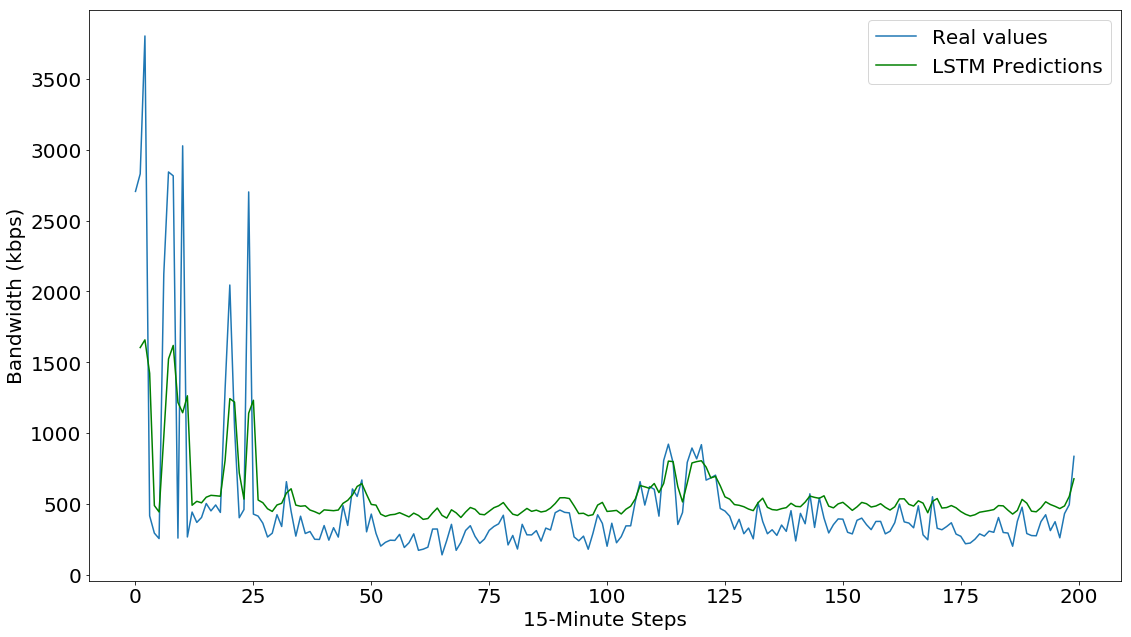

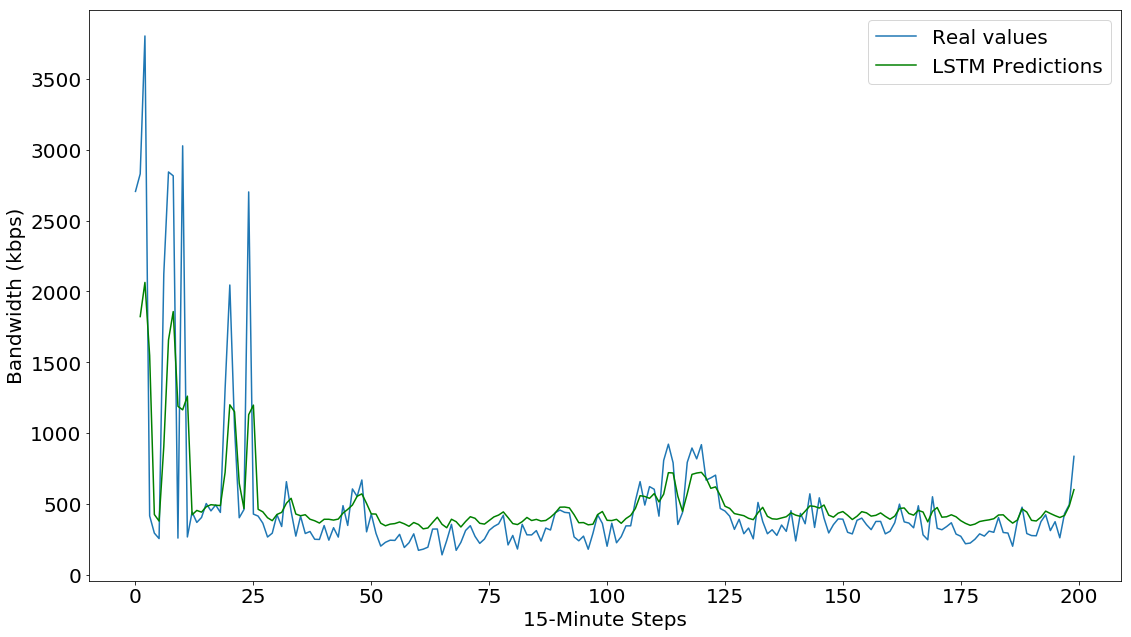

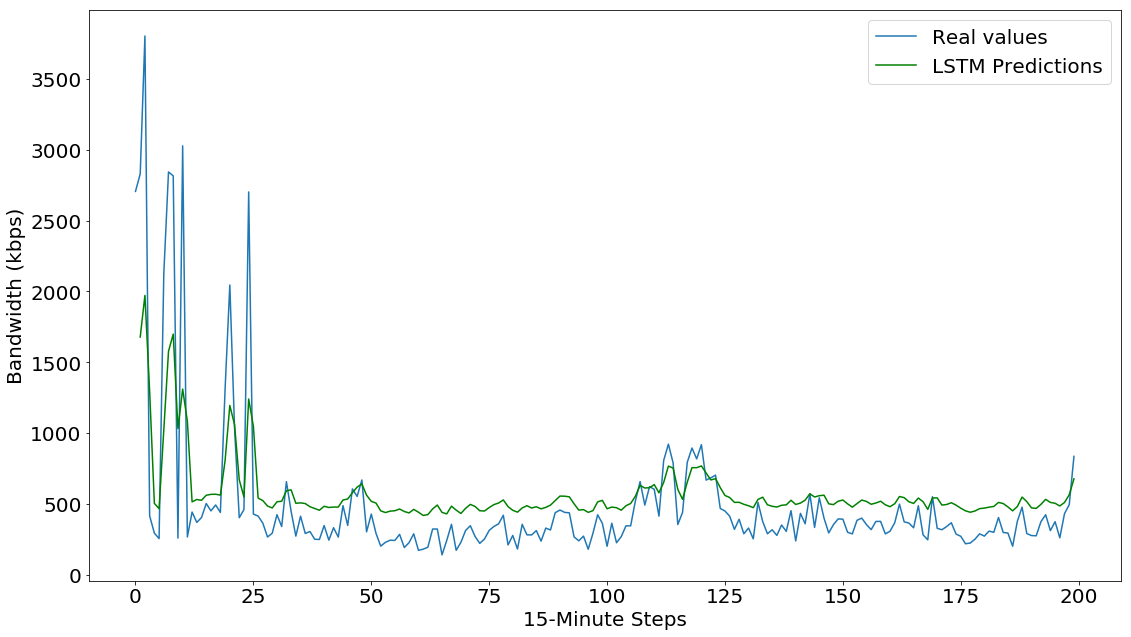

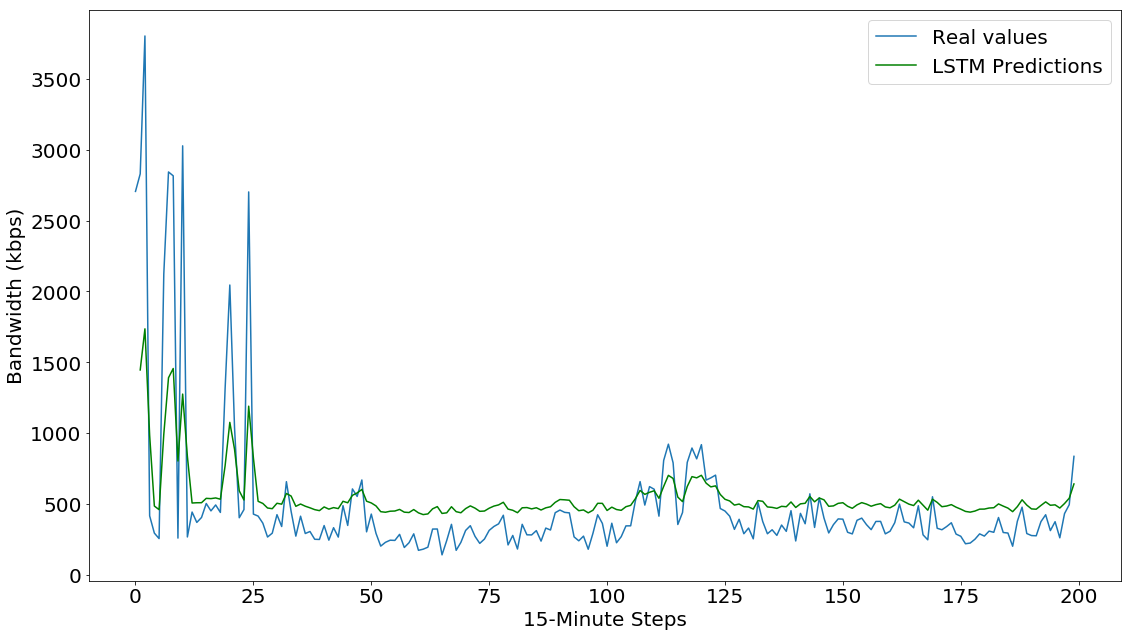

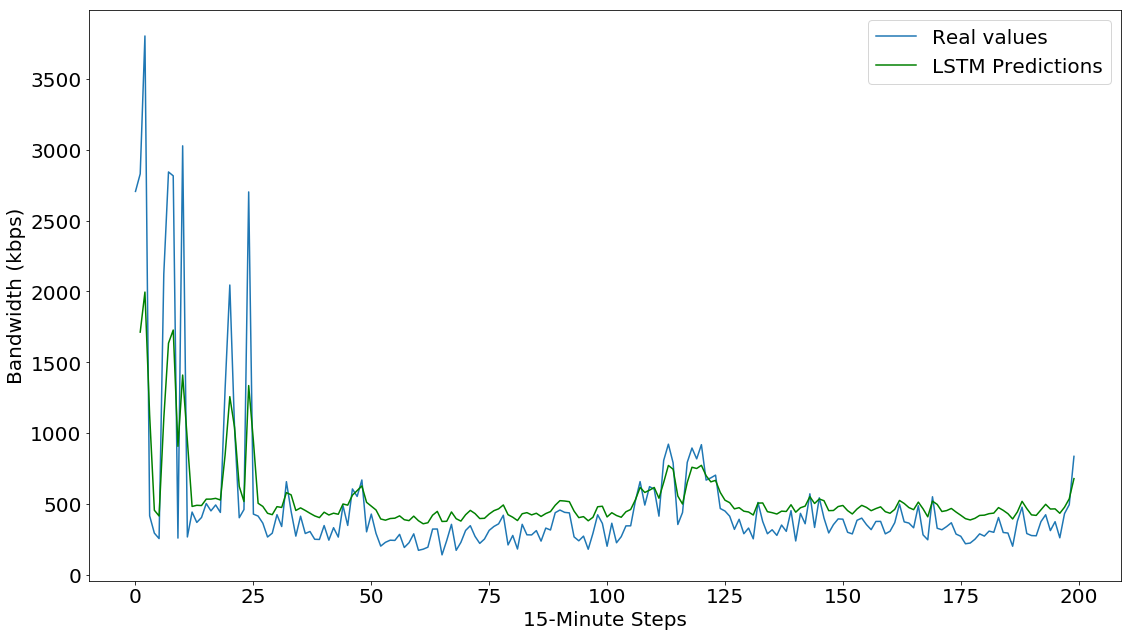

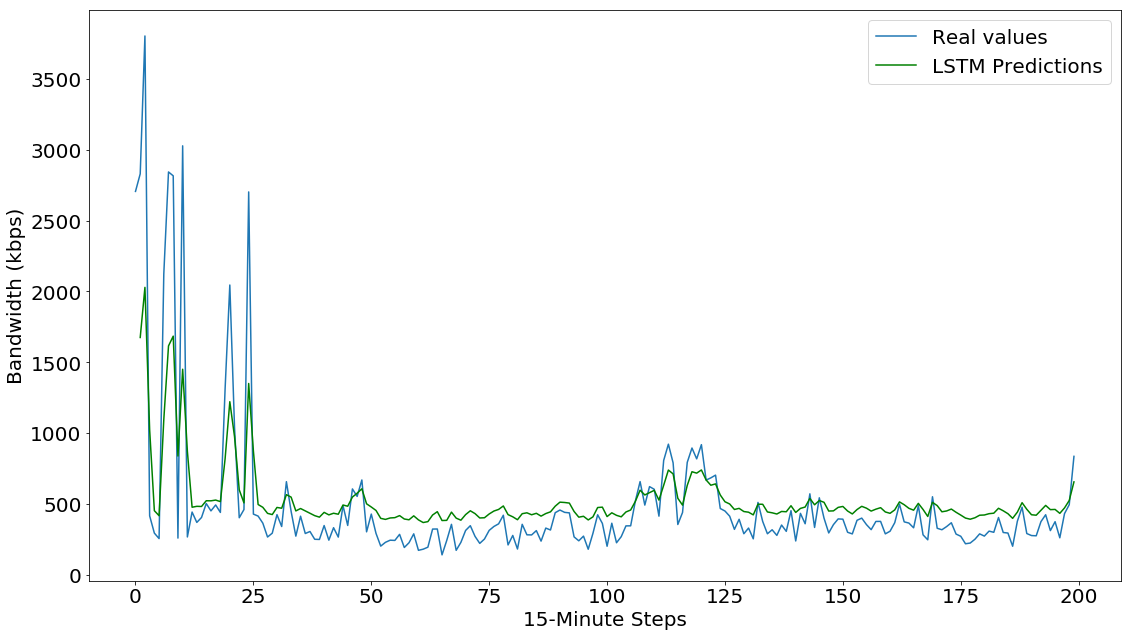

In [7]:
for x in range(0,6):
    fig, ax1 = plt.subplots()
    ax1.tick_params(labelsize = label_size)
    fig.set_size_inches(18.5, 10.5)
    plt.plot(subsets_testing[0].values, label='Real values')
    plt.plot(range(1,200), LSTMpredictions[x], color = 'green', label='LSTM Predictions')
    plt.xlabel('15-Minute Steps', fontsize = label_size)
    plt.ylabel('Bandwidth (kbps)', fontsize = label_size)
    ax1.legend(fontsize = label_size)
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\LSTMoptimization_{0}_take2.pdf'.format(x))
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\LSTMoptimization_{0}_take2.svg'.format(x))
    plt.show()

In [8]:
ARIMAmodels = []
ARIMApredictions = []
ARIMAconfInt = []
for x in range(1,7):
    # Fit a simple auto_arima model
    ARIMAmodel = pm.auto_arima(subsets_training[0][-100*x:].values.reshape(1,100*x)[0], error_action='ignore', trace=1, seasonal=True, m=4)
    print(ARIMAmodel.get_params())
    # Create predictions for the future, evaluate on test
    preds = []
    conf_ints = []
    for step in range(0,200):
        pred, conf_int = ARIMAmodel.predict(n_periods=1, return_conf_int=True)
        preds.append(pred)
        conf_ints.append(conf_int)
        ARIMAmodel.update(subsets_testing[0][step:step+1])
    ARIMAmodels.append(ARIMAmodel)
    ARIMApredictions.append(preds)
    ARIMAconfInt.append(conf_ints)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=1604.671, BIC=1625.512, Fit time=0.382 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=1618.557, BIC=1623.768, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=1611.679, BIC=1622.100, Fit time=0.093 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=1610.673, BIC=1621.094, Fit time=0.136 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 1, 4); AIC=1603.406, BIC=1621.643, Fit time=0.171 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 4); AIC=1602.203, BIC=1617.834, Fit time=0.205 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 4); AIC=1599.941, BIC=1612.967, Fit time=0.169 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=1605.286, BIC=1615.706, Fit time=0.149 seconds
Fit ARIMA: order=(1, 0, 3) seasonal_order=(0, 0, 0, 4); AIC=1602.321, BIC=1617.952, Fit time=0.101 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_o

Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 4); AIC=6513.504, BIC=6537.453, Fit time=0.394 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 4); AIC=6523.143, BIC=6543.101, Fit time=0.072 seconds
Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 4); AIC=6515.736, BIC=6543.676, Fit time=0.526 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=6522.787, BIC=6542.744, Fit time=0.057 seconds
Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 4); AIC=6515.383, BIC=6543.323, Fit time=0.502 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=6508.385, BIC=6524.351, Fit time=0.251 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 4); AIC=6515.248, BIC=6535.206, Fit time=0.090 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=6514.706, BIC=6534.663, Fit time=0.084 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 4); AIC=6515.526, BIC=6539.475, Fit time=0.310 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_o

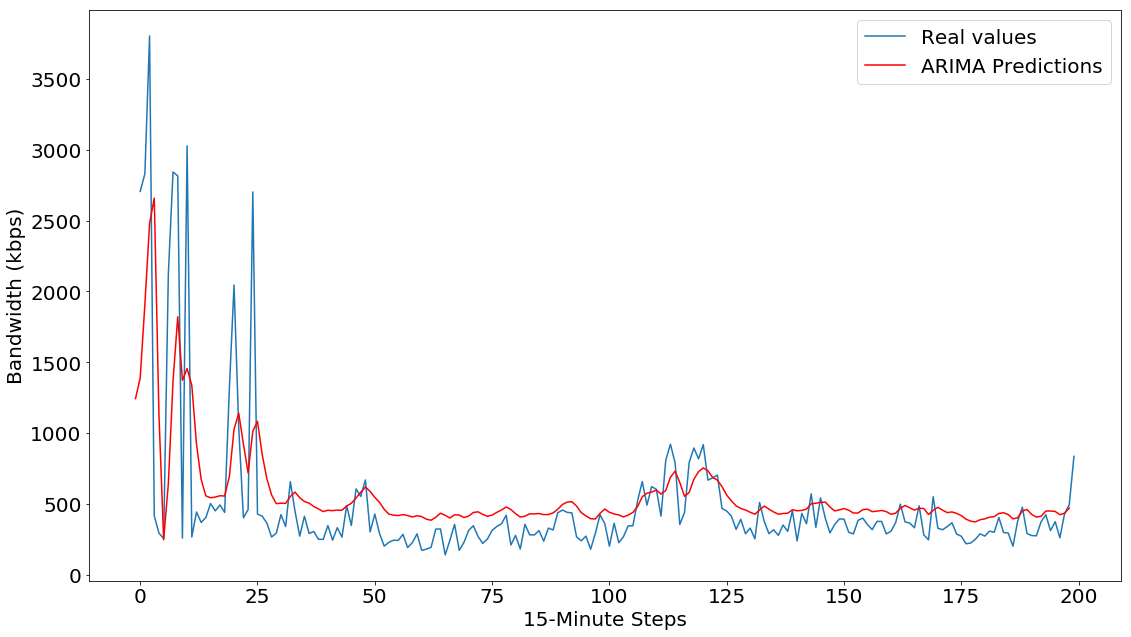

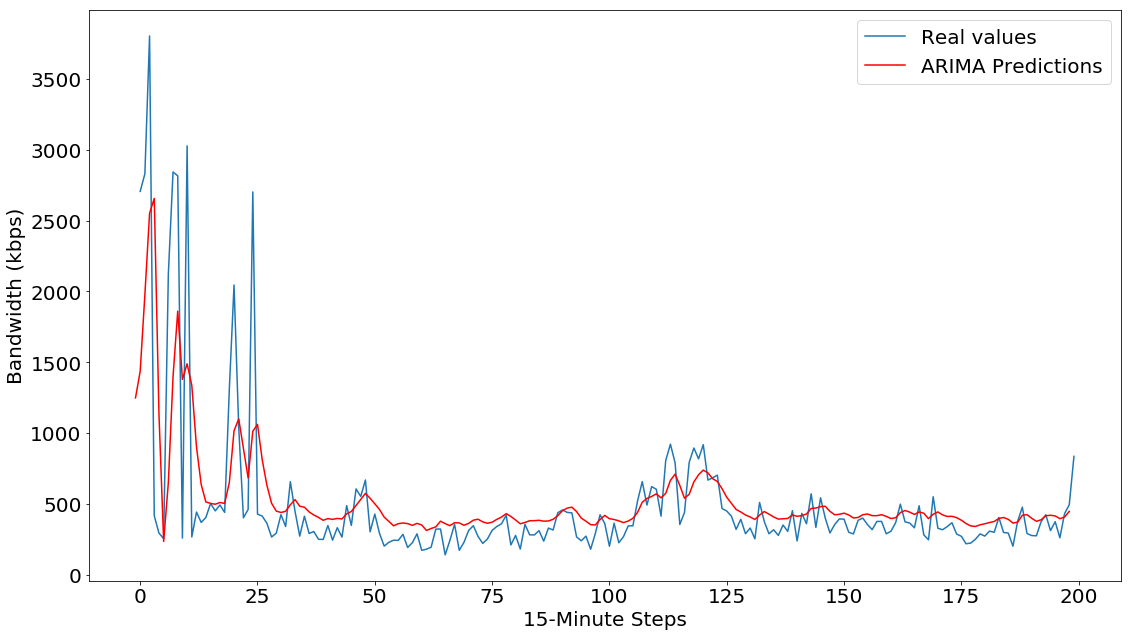

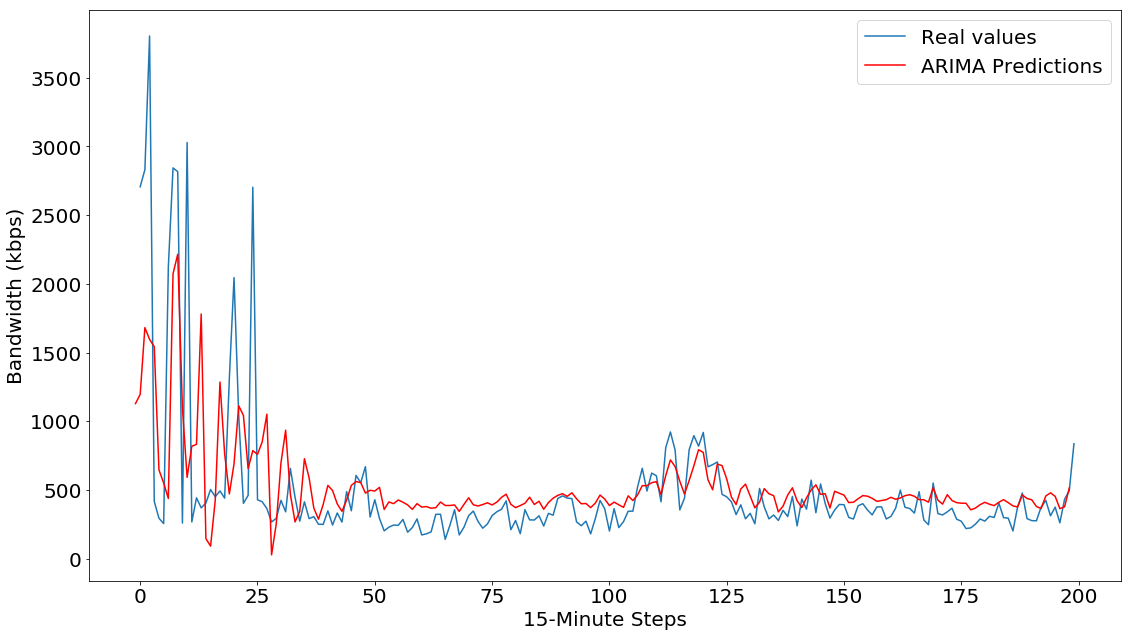

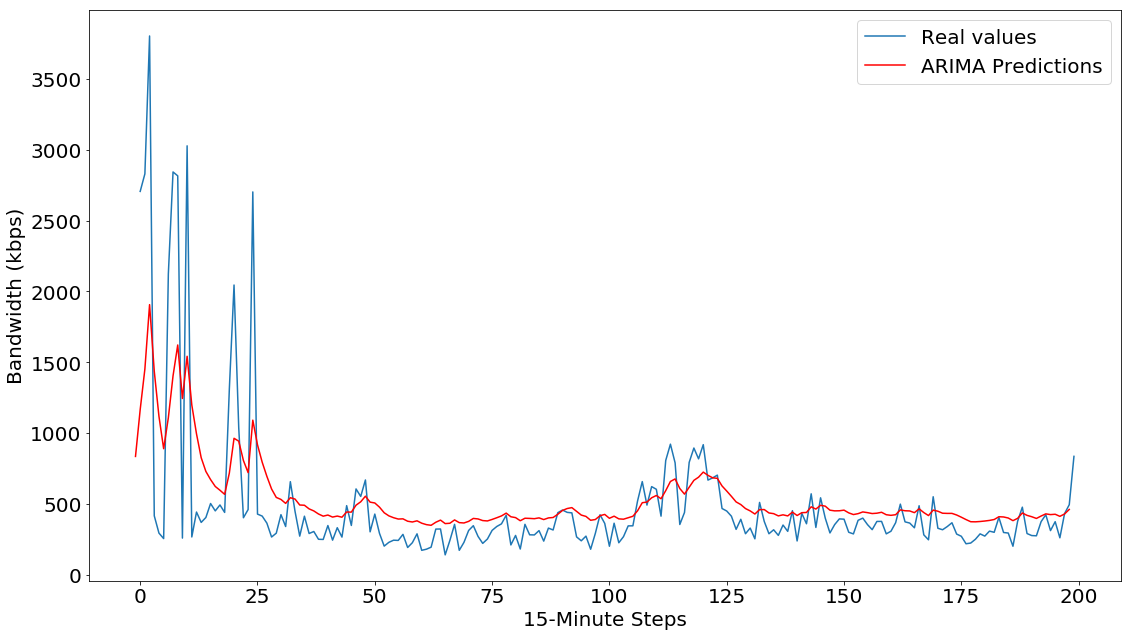

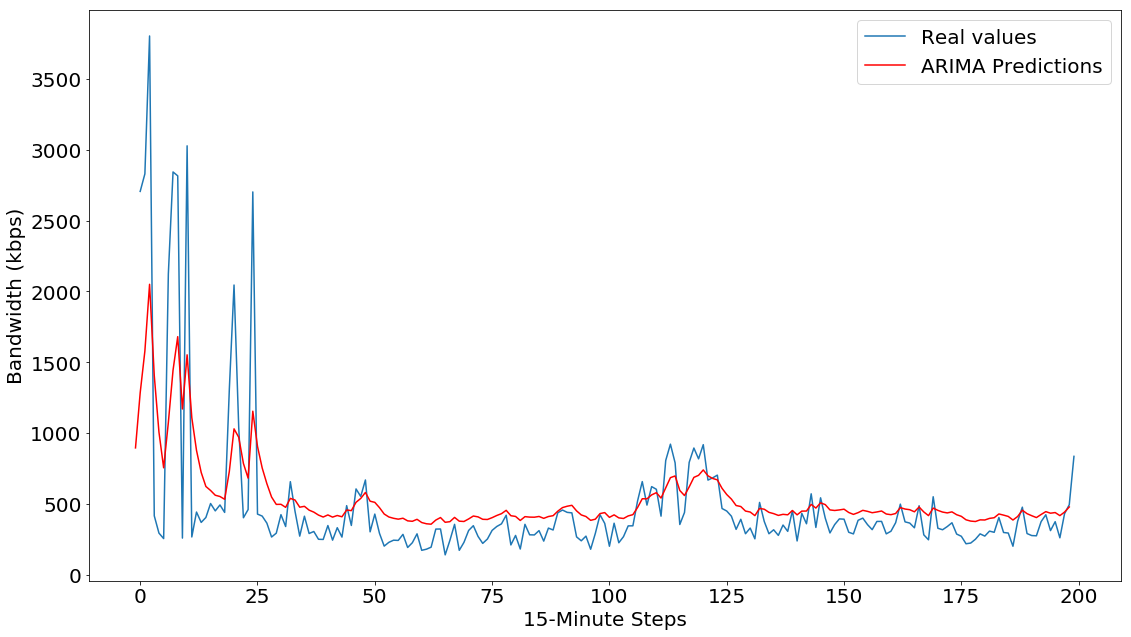

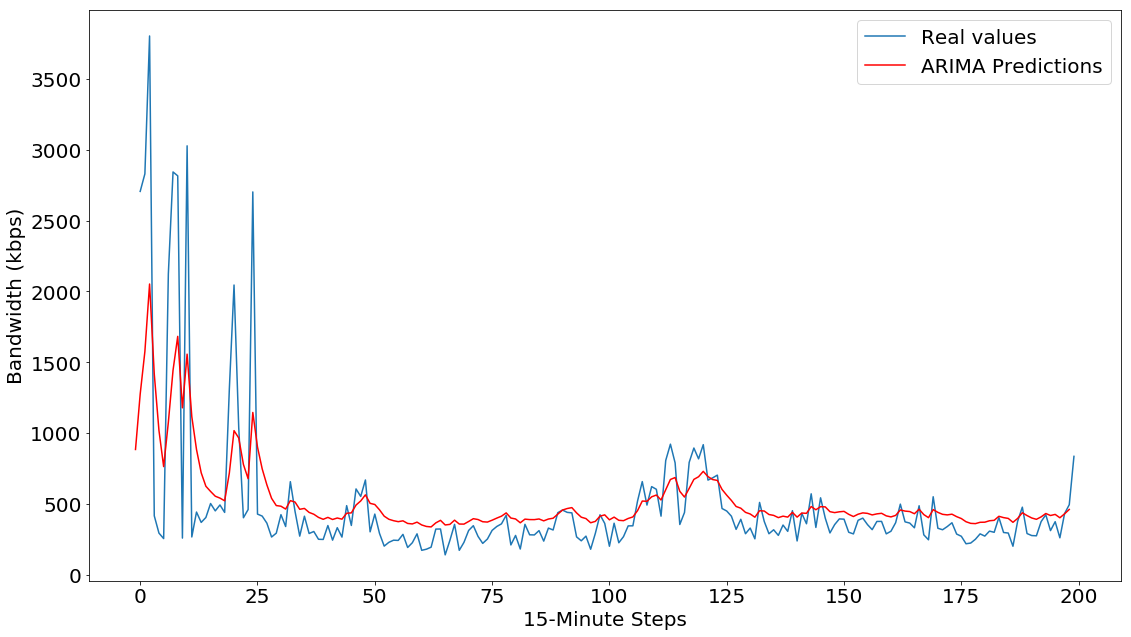

In [9]:
for x in range(0,6):
    fig, ax1 = plt.subplots()
    ax1.tick_params(labelsize = label_size)
    fig.set_size_inches(18.5, 10.5)
    plt.plot(subsets_testing[0].values, label='Real values')
    plt.plot(range(-1,199), ARIMApredictions[x], color = 'red', label = 'ARIMA Predictions')
    plt.xlabel('15-Minute Steps', fontsize = label_size)
    plt.ylabel('Bandwidth (kbps)', fontsize = label_size)
    ax1.legend(fontsize = label_size)
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\ARIMAprediction_{0}_take1.pdf'.format(x))
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\ARIMAprediction_{0}_take1.svg'.format(x))
    plt.show()

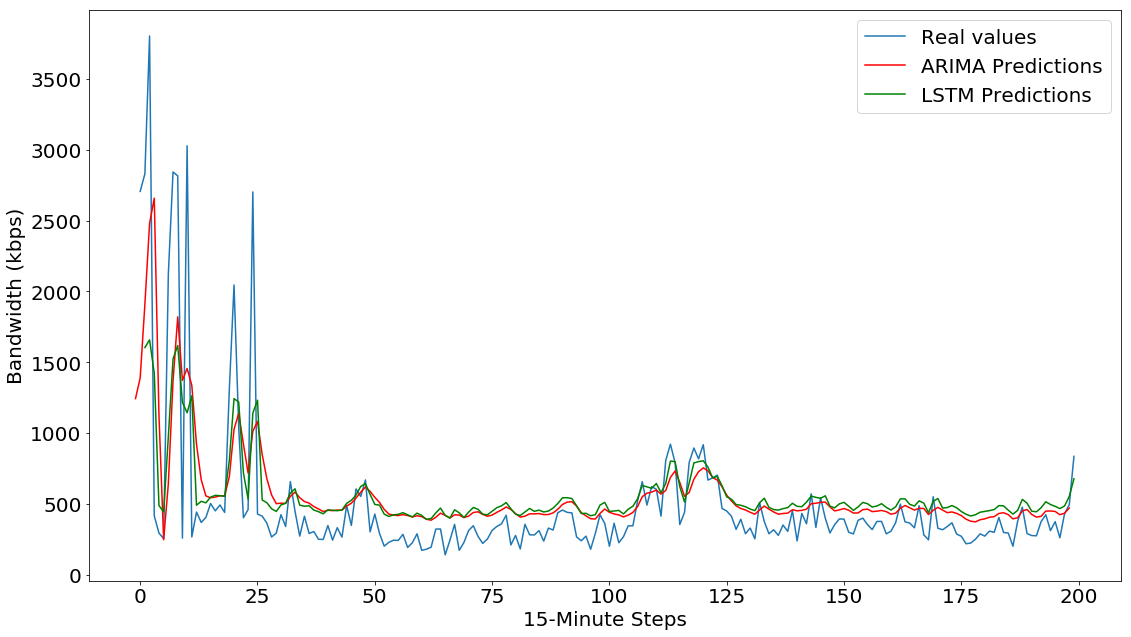

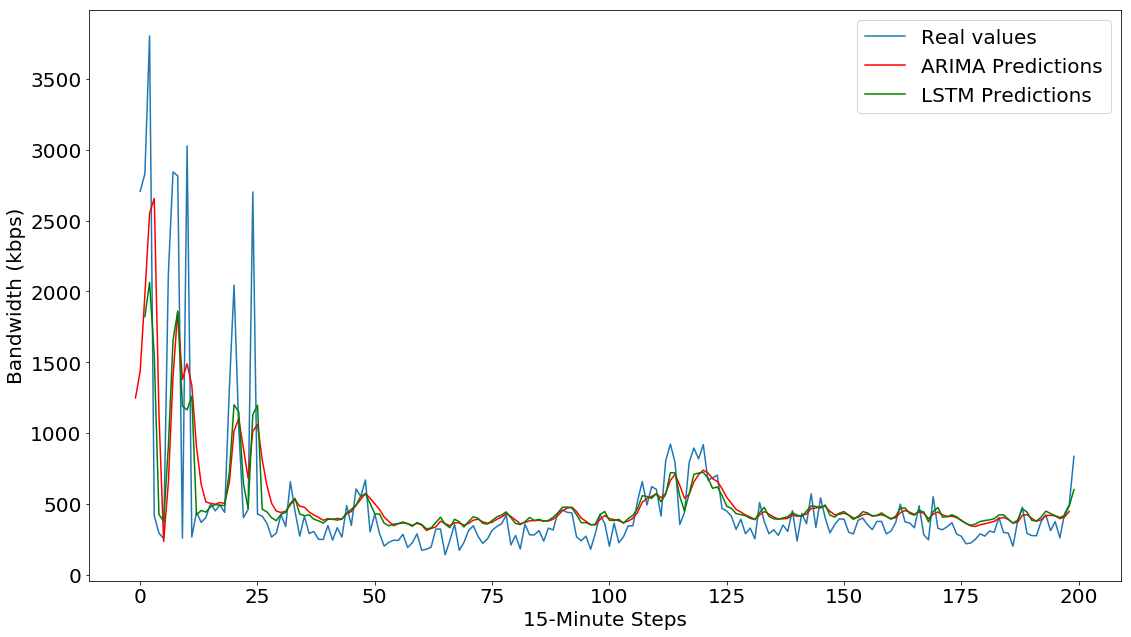

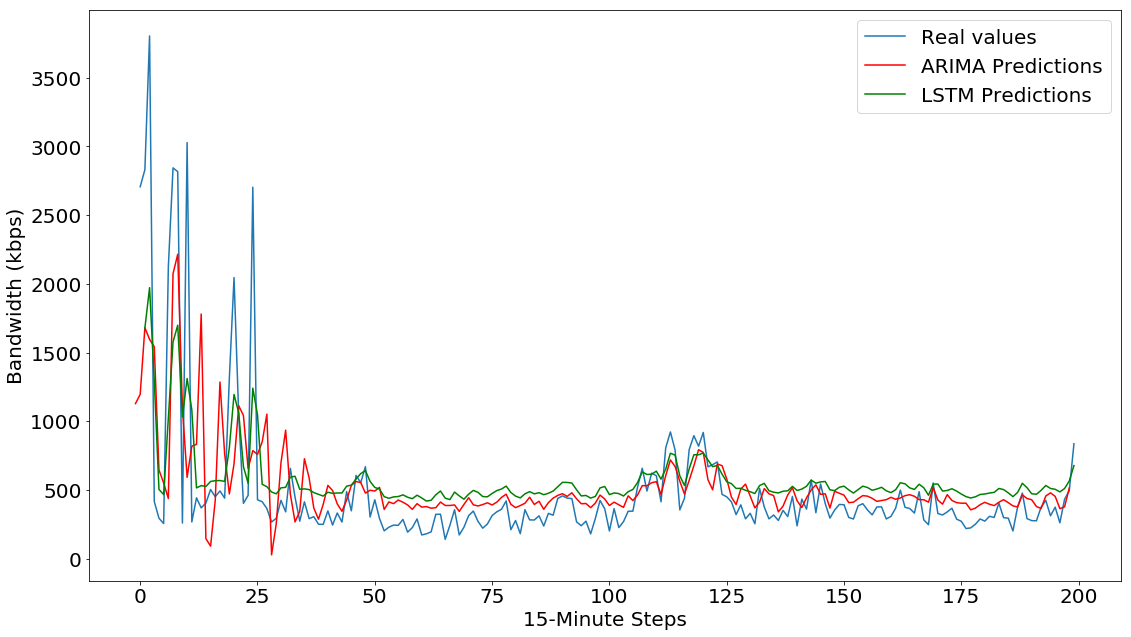

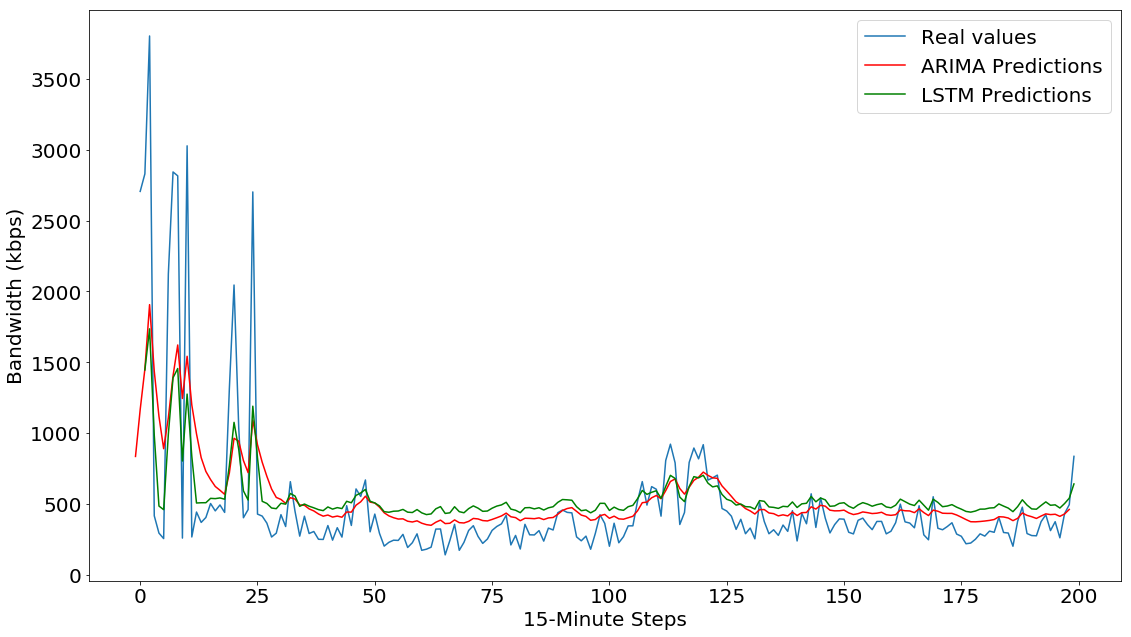

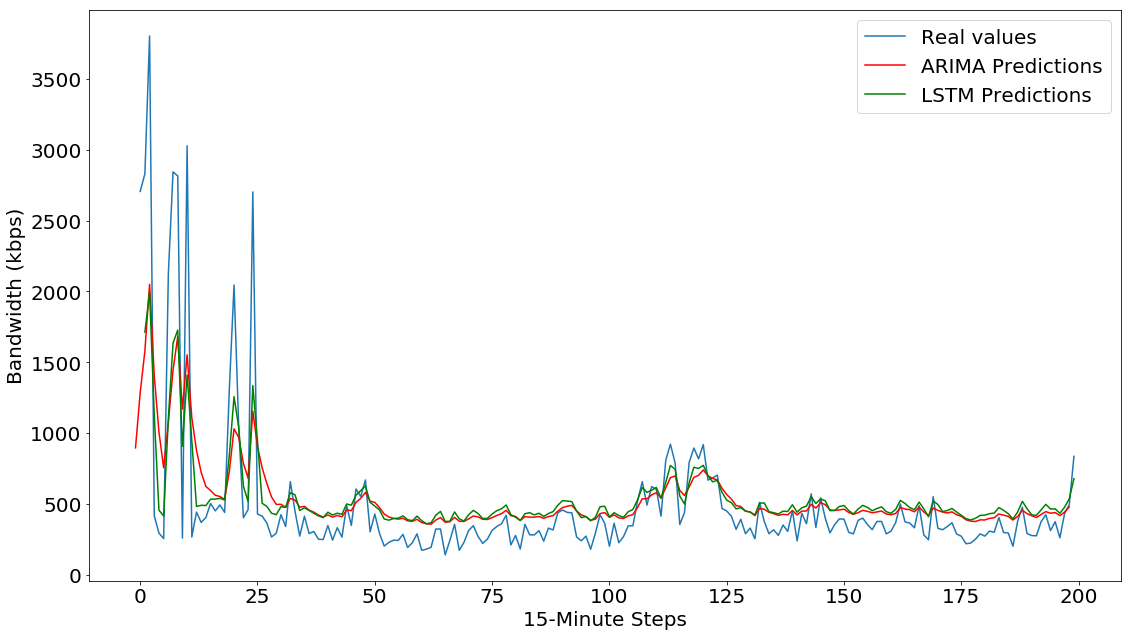

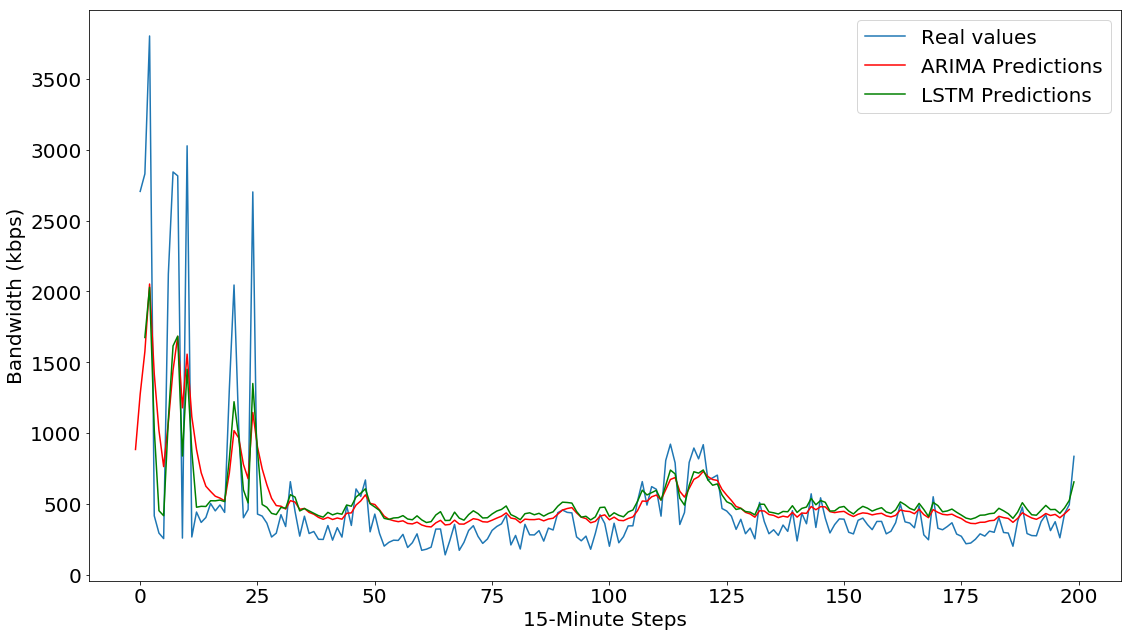

In [10]:
for x in range(0,6):
    fig, ax1 = plt.subplots()
    ax1.tick_params(labelsize = label_size)
    fig.set_size_inches(18.5, 10.5)
    plt.plot(subsets_testing[0].values, label='Real values')
    plt.plot(range(-1,199), ARIMApredictions[x], color = 'red', label='ARIMA Predictions')
    plt.plot(range(1,200),LSTMpredictions[x], color = 'green', label='LSTM Predictions')
    plt.xlabel('15-Minute Steps', fontsize = label_size)
    plt.ylabel('Bandwidth (kbps)', fontsize = label_size)
    ax1.legend(fontsize = label_size)
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\AvLprediction_{0}_take1.pdf'.format(x))
    plt.savefig('..\..\Documents\Thesis\Pictures\optimization\AvLprediction_{0}_take1.svg'.format(x))
    plt.show()